# COGS 118B Final Project - PCA

## Setup

In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading Data

In [2]:
top_songs = pd.read_csv("data_prepared.csv")
top_songs

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Summertime,Louis Armstrong,adult standards,1958,168,7,17,-21,14,10,298,92,3,66
1877,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1878,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1879,Johnny B. Goode,Chuck Berry,rock,1959,168,80,53,-9,31,97,162,74,7,74


In [3]:
characteristics_columns=list(top_songs.columns[4:13])
del characteristics_columns[6]
characteristics_columns

['Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Acousticness',
 'Speechiness']

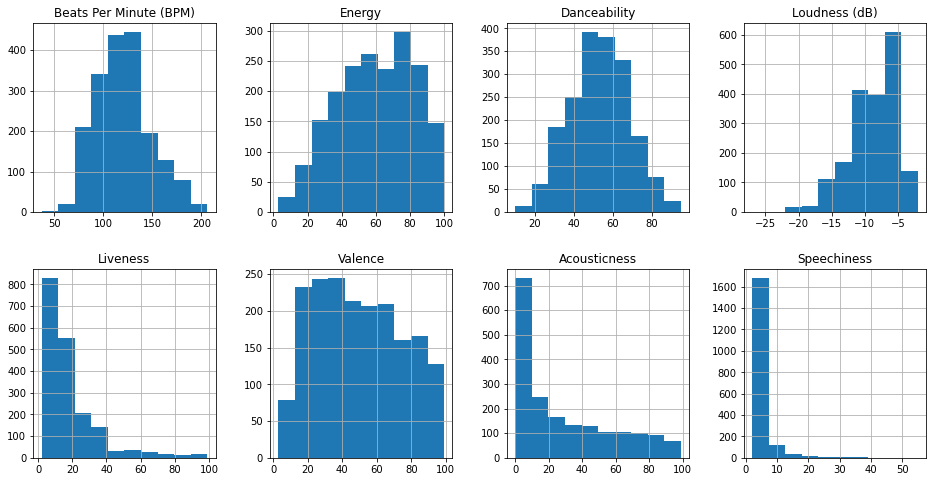

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
top_songs.hist(column=characteristics_columns, ax=axes);

In [5]:
characteristics_matrix = top_songs[characteristics_columns].to_numpy().transpose()
c_matrix=characteristics_matrix # to shorten this name
print(c_matrix)
print(c_matrix.shape)

[[157 135 168 ... 175 168 133]
 [ 30  79  69 ...  76  80  50]
 [ 53  50  66 ...  36  53  49]
 ...
 [ 68  81  52 ...  95  97  83]
 [ 94  17   2 ...  73  74  74]
 [  3   7  17 ...   6   7   3]]
(8, 1881)


In the above matrix, each column represents the characteristics for a song, to better match what we did in HW 4.

## PCA for Dimensionality Reduction

### eigsort.m from HW 4

In [6]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [7]:
mean_c=np.mean(c_matrix, axis=1, keepdims=True)
print(mean_c)

[[120.28442318]
 [ 59.59064327]
 [ 52.93407762]
 [ -9.01116427]
 [ 18.83094099]
 [ 49.45826688]
 [ 28.88995215]
 [  4.88463583]]


In [8]:
c_diff=c_matrix-mean_c
print(c_diff)

[[ 36.71557682  14.71557682  47.71557682 ...  54.71557682  47.71557682
   12.71557682]
 [-29.59064327  19.40935673   9.40935673 ...  16.40935673  20.40935673
   -9.59064327]
 [  0.06592238  -2.93407762  13.06592238 ... -16.93407762   0.06592238
   -3.93407762]
 ...
 [ 18.54173312  31.54173312   2.54173312 ...  45.54173312  47.54173312
   33.54173312]
 [ 65.11004785 -11.88995215 -26.88995215 ...  44.11004785  45.11004785
   45.11004785]
 [ -1.88463583   2.11536417  12.11536417 ...   1.11536417   2.11536417
   -1.88463583]]


In [9]:
cov_matrix=np.matmul(c_diff, c_diff.transpose())/7
dold, vold = np.linalg.eig(cov_matrix)
v, d = eigsort(vold, dold)
print(v)
print(d)

[[ 2.41157397e-01  9.38800092e-01  2.17456768e-01 -4.74693971e-02
   6.44181372e-02  8.13044361e-02  1.39962218e-02  8.40333716e-04]
 [ 5.20996693e-01 -7.49550046e-02 -8.93953635e-02  2.90597570e-01
  -7.20840932e-01  2.94860309e-01  3.91025813e-02 -1.49741283e-01]
 [ 1.16735403e-01 -2.09751261e-01  3.19797546e-01 -2.36546817e-01
   3.13995006e-01  8.27017613e-01  3.82126246e-02 -1.18821842e-02]
 [ 5.54533926e-02 -5.36354114e-03 -2.92497584e-02  3.68103110e-02
  -1.14895897e-01  6.76744056e-02  6.00397173e-02  9.86559652e-01]
 [ 5.49473658e-02 -1.93885341e-03 -2.19683911e-02  8.92295266e-01
   4.38209329e-01  8.82021758e-02  2.12688765e-02  6.64611951e-03]
 [ 4.06652977e-01 -2.47033190e-01  7.65384466e-01  1.26996547e-02
   4.67659802e-02 -4.29231129e-01 -9.29466543e-03  3.34737007e-02]
 [-6.96357745e-01  8.91888530e-02  5.05192229e-01  2.42828039e-01
  -4.12168050e-01  1.50717523e-01  1.28072074e-02 -1.35755958e-02]
 [ 2.00837292e-02  5.28851198e-03  8.93454083e-03  2.59371083e-02
  -

0.8113405826878755
0.9011183512468351


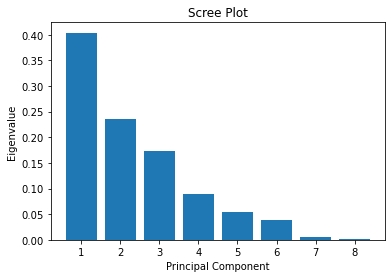

In [10]:
index_values = np.arange(8)+1
normalized_variability = d.diagonal()/sum(d.diagonal())
plt.bar(index_values,normalized_variability)
plt.title('Scree Plot');
plt.xlabel('Principal Component');
plt.ylabel('Eigenvalue');
plt.xticks(index_values);
print(normalized_variability[0]+normalized_variability[1]+normalized_variability[2])
print(normalized_variability[0]+normalized_variability[1]+normalized_variability[2]+normalized_variability[3])

From the Scree plot we can see that the first 2-3 components have the largest effect on the variability of the data, so we should focus on using those for further analysis. The first 2 make up 81.1% of the variability, while the first 3 make up 90.1% of the variability, well above the recommended 80% threshold.

In [11]:
new_c_matrix = np.matmul(v[:,0:3].transpose(), c_diff)
print(new_c_matrix)

[[-45.099322    34.25626141  37.28695531 ...  10.79055053  10.77988446
  -20.41060732]
 [ 37.93136734   4.14868103  38.41029022 ...  46.26240698  35.51823781
    9.21964674]
 [ 58.03616051  18.77872117   2.44200575 ...  60.88134075  67.50084327
   50.90018206]]


Project the old difference matrix into the new basis using the first 3 principle components.

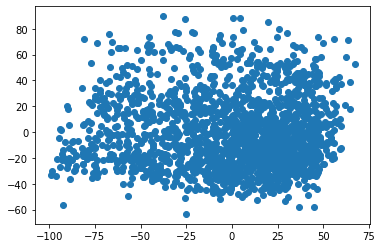

In [12]:
plt.scatter(new_c_matrix[0], new_c_matrix[1]);

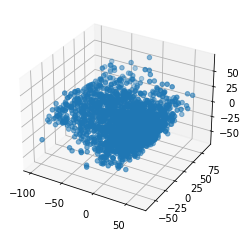

In [13]:
fig = plt.figure();
axes = fig.add_subplot(projection='3d');
axes.scatter(new_c_matrix[0], new_c_matrix[1], new_c_matrix[2]);